Title: Performance Evaluation

Task 1: Regression Metrics<br>
Use metrics like RMSE and MAE for the House Prices dataset.

In [1]:

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Data generation
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

# Evaluation with validation
if y_val.shape == y_val_pred.shape:
    mae = mean_absolute_error(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
else:
    print("Error: Shape mismatch between predictions and ground truth.")


MAE: 0.08
RMSE: 0.10


Task 2: Classification Metrics<br>
Evaluate the Iris dataset using accuracy, precision, recall, and F1-score.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

# Validate and evaluate
if y_val.shape == y_val_pred.shape:
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")
    print(f"Precision: {precision_score(y_val, y_val_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_val, y_val_pred, average='weighted'):.2f}")
    print(f"F1-score: {f1_score(y_val, y_val_pred, average='weighted'):.2f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
    print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
else:
    print("Error: Shape mismatch between predictions and ground truth.")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Confusion Matrix:
 [[13  0  0]
 [ 0  3  0]
 [ 0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



Task 3: AUC-ROC Curve for Churn Model<br>
Generate an AUC-ROC curve to evaluate customer churn model performance.

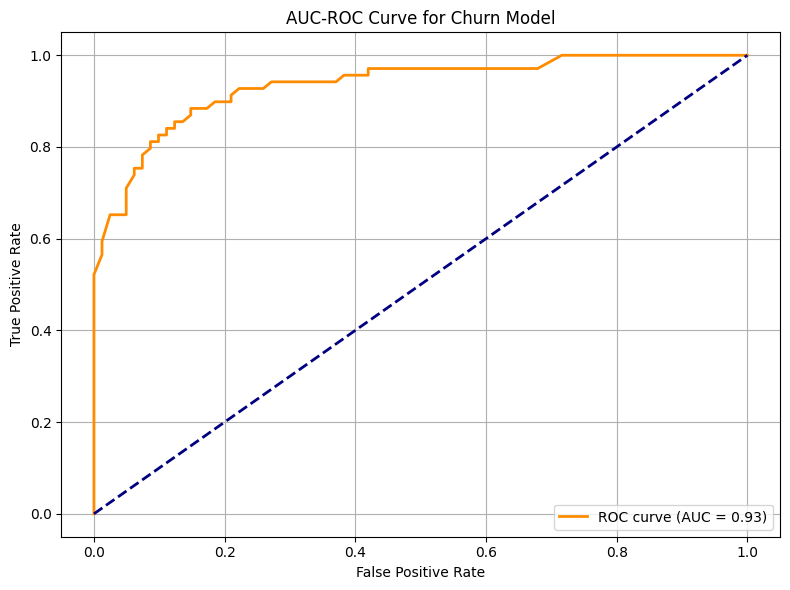

In [3]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Data generation
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)
y_val, y_test = train_test_split(y_temp, test_size=0.5, random_state=42)

# Check for class balance
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
if any(c < 5 for c in counts):
    print("Warning: Imbalanced classes in training data. AUC may be biased.")

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_val_prob = model.predict_proba(X_val)[:, 1]

# ROC computation
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Churn Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
